In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Colab에서 한글 사용
# 참고사이트 : https://teddylee777.github.io/colab/colab-korean
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 이후 런타임-런타임 다시 시작을 클릭하여 런타임을 재시작합니다.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 46 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,192 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and di

# 4장. 대중교통 데이터 프로젝트

## 1. 대중교토 데이터 시각화하기

수도권 대중교통 데이터 : 티머니 홈페이지 이용

[티머니](https://www.t-money.co.kr)
* 주소 : https://www.t-money.co.kr
* 로그인 절차 없이 홈페이지 접속 => "이용안내" 선택
* "대중교통 통계자료" 선택
* 최근 월간 교통카드 통계자료 게시글에서 엑셀 첨부 파일을 클릭해서 내려 받음

## 2. 지하철 유무임별 이용현황 데이터 정제하기

In [ ]:
# Colab에서 한글 사용
# 참고사이트 : https://teddylee777.github.io/colab/colab-korean
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 이후 런타임-런타임 다시 시작을 클릭하여 런타임을 재시작합니다.

In [ ]:
filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

for row in data:
  print(row)

f.close()

In [ ]:
# 데이터의 헤더 제외 및 정수형으로 변환

filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data) # 데이터의 헤더 제외

for row in data:
  for i in range(4, 8): # 데이터의 4열~7열 숫자형으로 변환
    row[i] = int(row[i].replace(',', '')) # replace()함수를 사용하여 콤마 처리
  print(row)

f.close()

## 3. 유임 승차 비율이 가장 높은 역은 어디일까?

0. rate = 유임승차인원 / 무임승차인원
1. 데이터를 읽어온다.
2. 모든 역의 데이터를 바탕으로 각 역의 비율(rate)을 계산한다.
3. 비율이 가장 높은 역을 찾는다.
4. 비율이 가장 높은 역은 어디인지, 그 비율이 얼마인지 출력한다.

In [ ]:
# 유임 승차 비율이 가장 높은 역 찾기

filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv

f = open(filename, 'r', encoding='cp949')
data = csv.reader(f)

next(data)
rate = 0 # 각 역의 비율 데이터를 저장할 변수 초기화
mx = 0 # rate의 최대값을 저장할 변수 초기화

for row in data:
  for i in range(4, 8):
    row[i] = int(row[i].replace(',', ''))

  if row[6]!=0:
    rate = row[4] / row[6] # row[4]:유임승차인원, row[6]:무임승차인원
  # rate = row[4] / row[6] # row[4]:유임승차인원, row[6]:무임승차인원

  if rate > mx:
    mx = rate

print(mx)

f.close()

In [ ]:
# 오류 해결-1 : 0으로 나누어 지는 역 출력

filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv

f = open(filename, 'r', encoding='cp949')
data = csv.reader(f)

next(data)
rate = 0
mx = 0

for row in data:
  for i in range(4, 8):
    row[i] = int(row[i].replace(',', ''))

  if row[6] == 0: # 무임승차인원이 0이라면
    print(row)    # 그 행 출력

f.close()

In [ ]:
# 오류 해결-2 : 정상적인 역 출력

filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv

f = open(filename, 'r', encoding='cp949')
data = csv.reader(f)

next(data)
rate = 0
mx = 0

for row in data:
  for i in range(4, 8):
    row[i] = int(row[i].replace(',', ''))

  if row[6] != 0: # 무임승차인원이 0이 아니라면
    rate = row[4] / row[6]
    if rate > mx:    # rate값이 mx값보다 크다면
      mx = rate      # mx값을 rate값으로 업데이트 한다.
      print(row, round(rate, 2)) # 업데이트 된 값 출력. round(rate, 2) : rate값을 소수점 둘째 자리까지 반올림하는 명령어

f.close()

# 마곡나루(서울식물원)이 유임승차비율이 제일 높다.

In [ ]:
# 비율방식 변경 => rate = 유임 승차 인원 / 전체(유임+무임) 인원

filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv

f = open(filename, 'r', encoding='cp949')
data = csv.reader(f)

next(data)
rate = 0
mx = 0

for row in data:
  for i in range(4, 8):
    row[i] = int(row[i].replace(',', ''))

  if row[6] != 0 and (row[4]+row[6]) > 100000 : # 0으로 나누어지는 것 방지 그리고 유무임 승차 인원 합이 100,000명 이상인 경우
    rate = row[4] / (row[4] + row[6])  # 비율방식 변경 = 유임승차인원 / 전체(유임+무임) 인원
    if rate > mx:
      mx = rate
      print(row, round(rate, 2))

f.close()

In [ ]:
# 유임 승차 비율이 높은 역들 출력 : if rate > 0.93:

filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv

f = open(filename, 'r', encoding='cp949')
data = csv.reader(f)

next(data)
rate = 0
mx = 0

for row in data:
  for i in range(4, 8):
    row[i] = int(row[i].replace(',', ''))

  if row[6] != 0 and (row[4]+row[6]) > 100000 :
    rate = row[4] / (row[4] + row[6])
    if rate > 0.93 :
      print(row, round(rate, 2))

f.close()

In [ ]:
# 유임 승차 비율이 가장 높은 역 찾기

filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
rate = 0
mx = 0
mx_station = '' # 유임 승차 비율이 가장 높은 역 저장할 변수 선언

for row in data:
  for i in range(4, 8):
    row[i] = int(row[i].replace(',', ''))

  if row[6] != 0 and (row[4]+row[6]) > 100000 :
    rate = row[4] / (row[4] + row[6])
    if rate > mx :
      mx = rate
      mx_station = row[3] + ' ' + row[1]

print(mx_station, round(mx*100, 2))

f.close()

## 4. 유무임 승하차 인원이 가장 많은 역은 어디일까

1. 데이터를 읽어온다.
2. 모든 역의 데이터를 바탕으로 유임 승차, 유임 하차, 무임 승차, 무임 하차 인원이 가장 많은 역을 찾는다.
3. 각각의 인원이 가장 많은 역을 출력한다.

In [ ]:
# 데이터의 헤더 파일 출력

filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv

f = open(filename, 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)
print(header)

f.close()

In [ ]:
# 유무임 승하차 인원이 가장 많은 역 찾기

filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)

mx = [0] * 4 # 인원수에 대한 정보 4개를 리스트 변수 선언
mx_station = [''] * 4  # 역에 대한 정보 4개를 리스트 변수 선언
label = ['유임승차', '유임하차', '무임승차', '무임하차'] # 각 항목에 대한 라벨 설정

for row in data:
  for i in range(4, 8):
    row[i] = int(row[i].replace(',', ''))
    if row[i] > mx[i-4]:
      mx[i-4] = row[i]
      mx_station[i-4] = row[3] + ' ' +row[1]

for i in range(4):
  print(label[i]+ ' : ' + mx_station[i], mx[i])

f.close()

## 5. 모든 역의 유무임 승하차 비율은 어떻게 될까

In [ ]:
# 모든 역에 대한 유무임 승하차 비율 표시 : 파이 차트로 표현

filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv
import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

f = open(filename, 'r', encoding='cp949')
data = csv.reader(f)

next(data)

label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data:
  for i in range(4, 8):
    row[i] = int(row[i].replace(',', ''))

  plt.pie(row[4:8])
  plt.axis('equal')
  plt.show()

f.close()

In [ ]:
# 코드 보완
# 1. 어떤 역에 대한 차트인지 정보가 부족
# 2. 비율을 수치로 정확하게 나타나면 더 좋을 것 같음
# 3. 색상을 좀 더 예쁘게 바꾸고 싶음

# 역 이름을 제목으로 표시, 각각의 비율, 레이블, 색상을 추가

filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv
import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

f = open(filename, 'r', encoding='cp949')
data = csv.reader(f)

next(data)

label = ['유임승차', '유임하차', '무임승차', '무임하차']

c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

for row in data:
  for i in range(4, 8):
    row[i] = int(row[i].replace(',', ''))

  plt.figure(dpi=120)
  plt.title(row[3] +' ' + row[1])
  plt.pie(row[4:8], labels=label, colors=c, autopct='%.1f%%')
  plt.axis('equal')
  plt.show()

f.close()

In [ ]:
# 파이차트 이미지로 저장

filename = '/content/drive/My Drive/DATA/subwayfee.csv'

import csv
import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

f = open(filename, 'r', encoding='cp949')
data = csv.reader(f)

next(data)

label = ['유임승차', '유임하차', '무임승차', '무임하차']

c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

for row in data:
  for i in range(4, 8):
    row[i] = int(row[i].replace(',', ''))

  plt.figure(dpi=120)
  plt.title(row[3] +' ' + row[1])
  plt.pie(row[4:8], labels=label, colors=c, autopct='%.1f%%')
  plt.axis('equal')

  path = '/content/drive/My Drive/DATA/piechart/'
  plt.savefig(path + row[3] +' ' + row[1] + '.png') # 이미지 파일로 저장

  plt.show()

f.close()

## 6. 지하철 시간대별 데이터 시각화하기

# 새 섹션

* 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까요?
* 지하철 시간대별로 가장 많은 사람이 승하차 하는 역은 어디일까요?

1. 지하철 시간대별 이용 현황 데이터 정제하기
* 지하철 시간대별 이용현황 탭 사용

In [ ]:
# 지하철 시간대별 이용현황 출력

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

for row in data:
  print(row)

f.close()

['\ufeff사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '', '작업일시']
['', '', '', '', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '']
['2023-05', '1호선', '0150', '서울역', '708', '37', 

In [ ]:
# 데이터 정리 : 헤더가 2개가 있음.

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
next(data)

for row in data:
  # row[4:] = map(int, row[4:])  # 데이터를 한꺼번에 정수형으로 변환
  # map의 첫번째인자 : 일괄 적용할 함수 이름 / 두번째인자 : 그 함수를 적용할 데이터
  print(row[4:])

f.close()

['708', '37', '8,611', '9,912', '13,730', '57,527', '43,711', '114,851', '74,850', '231,336', '65,578', '158,131', '65,755', '79,625', '79,631', '73,733', '94,037', '84,112', '92,253', '83,301', '73,960', '73,359', '102,173', '80,765', '118,993', '83,590', '172,178', '96,236', '221,468', '96,309', '119,553', '65,443', '84,794', '49,116', '85,979', '43,530', '58,561', '29,390', '25,581', '15,133', '2,631', '2,693', '0', '228', '0', '0', '0', '0', '2023-06-03 10:09:56']
['90', '3', '2,505', '4,754', '4,137', '24,662', '8,198', '75,913', '10,841', '197,338', '13,630', '92,068', '16,041', '47,494', '22,921', '47,282', '25,286', '45,380', '31,543', '46,158', '40,118', '34,764', '53,374', '30,536', '62,810', '28,727', '95,420', '29,184', '161,267', '27,054', '64,613', '14,185', '57,539', '9,360', '51,046', '8,940', '32,944', '6,666', '10,711', '4,344', '354', '933', '0', '25', '0', '0', '0', '0', '2023-06-03 10:09:56']
['148', '1', '4,237', '5,175', '4,552', '28,499', '7,062', '109,138', '11

2. 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?

In [ ]:
# 출근 시간대 : 7시 row[10]

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
next(data)

result = []

for row in data:
  # # row[4:] = map(int, row[4:])
  row[4:] = map(int, [t.replace(',', '') for t in row[4:-1]]) #내가 수정함 1.전체,제거 2.마지막값 달라서 제거
  result.append(row[10])

print(len(result))
print(result)

f.close()

614
[43711, 8198, 7062, 5937, 6231, 14774, 22069, 23391, 39465, 7379, 5528, 11412, 6481, 5626, 7641, 29803, 41512, 26552, 5811, 18415, 23552, 54613, 69426, 79149, 39817, 120887, 59560, 17306, 14570, 22096, 16058, 40958, 26897, 19065, 23635, 78309, 85581, 130421, 85184, 191325, 94178, 144430, 69899, 139923, 44461, 39856, 47074, 44330, 64565, 38093, 28707, 30722, 16099, 8861, 6427, 4695, 3226, 35636, 51848, 5314, 29488, 87779, 125832, 53701, 75378, 69050, 17298, 16118, 14226, 6297, 1997, 3125, 0, 6021, 27276, 27629, 24290, 17182, 11828, 13079, 28315, 11160, 31476, 35897, 17995, 9594, 28068, 4543, 29965, 25810, 37472, 20920, 23287, 29303, 42786, 88590, 53099, 88314, 128461, 117132, 47275, 95273, 91332, 48305, 31616, 18301, 5262, 8109, 11446, 7889, 5434, 12946, 18477, 7360, 12735, 13665, 2183, 49646, 73320, 2291, 12396, 13703, 23244, 18891, 27607, 42925, 9781, 25356, 39231, 16109, 47779, 38701, 36259, 88025, 26872, 96040, 19251, 29565, 70782, 46436, 78340, 49727, 16721, 59378, 11075, 14354

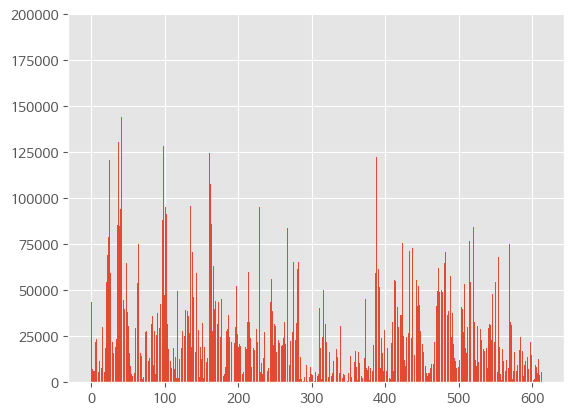

In [ ]:
# 막대 그래프 표현

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
next(data)

result = []

for row in data:
  # row[4:] = map(int, row[4:])
  row[4:] = map(int, [t.replace(',', '') for t in row[4:-1]]) #내가 수정함 1.전체,제거 2.마지막값 달라서 제거
  result.append(row[10])

f.close()

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

plt.style.use('ggplot')

plt.bar(range(len(result)), result)

plt.show()

In [ ]:
# 막대 그래프 표현 - 오름차순 정리

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
next(data)

result = []

for row in data:
  # row[4:] = map(int, row[4:])
  row[4:] = map(int, [t.replace(',', '') for t in row[4:-1]]) #내가 수정함 1.전체,제거 2.마지막값 달라서 제거
  result.append(row[10])

f.close()

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

plt.style.use('ggplot')

result.sort() # 결과값을 오름차순으로 정리

plt.bar(range(len(result)), result)

plt.show()

In [ ]:
# 출근 시간대에 가장 많은 승차 인원이 탑승하는 역은?

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
next(data)

mx = 0 # 최대값 저장 변수
mx_station = ''  # 최대값 갖는 역이름 저장 변수

for row in data:  # 최대값 찾기(전부 탐색하여 최대값을 갱신하는 방식)
  # row[4:] = map(int, row[4:])
  row[4:] = map(int, [t.replace(',', '') for t in row[4:-1]]) #내가 수정함 1.전체,제거 2.마지막값 달라서 제거
  if sum(row[10:15:2]) > mx :
    mx = sum(row[10:15:2])
    mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

f.close()

In [ ]:
# 출근 시간대 사람들이 가장 많이 타고 내리는 역 찾기

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
next(data)

mx = 0
mx_station = ''

for row in data:
  row[4:] = map(int, [t.replace(',', '') for t in row[4:-1]]) #내가 수정함 1.전체,제거 2.마지막값 달라서 제거
  # row[4:] = map(int, row[4:])
  a = row[11:16:2] # 하차 인원 값 추출하기
  if sum(a) > mx :
    mx = sum(a)
    mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

f.close()

3. 밤 11시에 사람들이 가장 많이 타는 역은 어디일까?

In [ ]:
# 밤 11시에 사람들이 가장 많이 타고 내리는 역을 찾는 코드

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
next(data)

mx = 0
mx_station = ''

t = int(input('승차인원이 가장 많은 역의 시간을 입력 해 주세요. : '))

for row in data:
  # row[4:] = map(int, row[4:])
  row[4:] = map(int, [t.replace(',', '') for t in row[4:-1]]) #내가 수정함 1.전체,제거 2.마지막값 달라서 제거
  a = row[4+(t-4)*2] # 입력 받은 시각의 승차 인원 값 추출하기
  if a > mx :   # 모든 데이터 탐색
    mx = a
    mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

f.close()

4. 시간대별로 사람들이 가장 많이 타고 내리는 역은 어디일까?

In [ ]:
# 시간대별 사람들이 가장 많이 타고 내리는 역

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
next(data)

mx = [0] * 24 # 시간대별 최대 승차 인원 저장 리스트 변수
mx_station = [''] * 24 # 시간대별 최대 승차 인원 역 이름 저장 리스트 변수

for row in data:
  # row[4:] = map(int, row[4:])
  row[4:] = map(int, [t.replace(',', '') for t in row[4:-1]]) #내가 수정함 1.전체,제거 2.마지막값 달라서 제거
  for j in range(24):
    a = row[j*2+4] # j와 인덱스 번호 사이의 관계식 이용
    if a > mx[j] :
      mx[j] = a
      mx_station[j] = row[3]

print(mx_station)
print(mx)

f.close()

In [ ]:
# 시간대별 사람들이 가장 많이 타고 내리는 역 - 막대 그래프 그리기

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
next(data)

mx = [0] * 24 # 시간대별 최대 승차 인원 저장 리스트 변수
mx_station = [''] * 24 # 시간대별 최대 승차 인원 역 이름 저장 리스트 변수

for row in data:
  # row[4:] = map(int, row[4:])
  row[4:] = map(int, [t.replace(',', '') for t in row[4:-1]]) #내가 수정함 1.전체,제거 2.마지막값 달라서 제거
  for j in range(24):
    a = row[j*2+4] # j와 인덱스 번호 사이의 관계식 이용
    if a > mx[j] :
      mx[j] = a
      mx_station[j] = row[3]

f.close()

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

plt.style.use('ggplot')
plt.figure(figsize=(12,4), dpi=120)
plt.bar(range(24), mx)

plt.xticks(range(24), mx_station, rotation=45) # x축에 시간대별 1위를 차지한 역의 이름을 90도 회전하여 표현

plt.show()

In [ ]:
# 시간대별 사람들이 가장 많이 타고 내리는 역 - 막대 그래프 그리기 (시간정보 추가)

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
next(data)

mx = [0] * 24
mx_station = [''] * 24

for row in data:
  row[4:] = map(int, [t.replace(',', '') for t in row[4:-1]]) #내가 수정함 1.전체,제거 2.마지막값 달라서 제거
  row[4:] = map(int, row[4:])

  for j in range(24):
    a = row[j*2+4]
    if a > mx[j] :
      mx[j] = a
      mx_station[j] = row[3] + '(' + str(j+4) + '시)'  # 시간정보 표시

f.close()

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

plt.style.use('ggplot')
plt.figure(figsize=(12,4), dpi=120)
plt.bar(range(24), mx)

plt.xticks(range(24), mx_station, rotation=90) # x축에 시간대별 1위를 차지한 역의 이름을 90도 회전하여 표현

plt.show()

In [ ]:
# 시간대별로 하차 인원이 가장 많은 역을 찾는 코드

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
next(data)

mx = [0] * 24
mx_station = [''] * 24

for row in data:
  # row[4:] = map(int, row[4:])
  row[4:] = map(int, [t.replace(',', '') for t in row[4:-1]]) #내가 수정함 1.전체,제거 2.마지막값 달라서 제거
  for j in range(24):
    b = row[5 + j * 2] # j값과 인덱스 번호 값의 관계식 사용
    if b > mx[j] :
      mx[j] = b
      mx_station[j] = row[3] + '(' + str(j+4) + '시)'  # 시간정보 표시

f.close()

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

plt.style.use('ggplot')
plt.figure(figsize=(12,4), dpi=120)
plt.bar(range(24), mx, color='b') # 막대그래프 컬러 속성 추가

plt.xticks(range(24), mx_station, rotation=45) # x축에 시간대별 1위를 차지한 역의 이름을 90도 회전하여 표현

plt.show()

5. 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면

 1) 데이터를 읽어온다.

 2) 모든 역에 대해 시간대별 승차 인원과 하차 인원을 누적해서 더한다.

 3) 시간대별 승차 인원과 하차 인원을 그래프로 표현한다.

In [ ]:
# 지하철 시간대별 승하차 인원 추이를 나타내는 코드

filename = '/content/drive/My Drive/DATA/subwaytime.csv'

import csv

f = open(filename, 'r', encoding='UTF8')
data = csv.reader(f)

next(data)
next(data)

s_in = [0] * 24  # 승차 인원 저장 리스트 초기화
s_out = [0] * 24 # 하차 인원 저장 리스트 초기화

for row in data:
  # row[4:] = map(int, row[4:])
  row[4:] = map(int, [t.replace(',', '') for t in row[4:-1]]) #내가 수정함 1.전체,제거 2.마지막값 달라서 제거
  for i in range(24):
    s_in[i] += row[4+i*2]
    s_out[i] += row[5+i*2]

f.close()

import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")    # 한글 글꼴 사용
plt.rcParams['axes.unicode_minus'] = False   # 수치상의 -기호 표시하기

plt.style.use('ggplot')
plt.figure(figsize=(12,4), dpi=120)

plt.title('지하철 시간대별 승하차 인원 추이')  # 제품추가

plt.plot(s_in, label='승차')  # 승차 인원을 꺾은선 그래프로 표현
plt.plot(s_out, label='하차') # 하차 인원을 꺾은선 그래프로 표현

plt.legend()
plt.xticks(range(24), range(4,28))  # xticks의 첫번째 인자 : 위치 / 두번째 인자 : 각각의 해당하는 값

plt.show()